# 2-qubit decomposition

Suppose we have a L-qubit hamiltonian $H$, then the rotation $e^{-itH}$ is a unitary operation. By the principle of universal operations, we can decompose this unitary operation into 2-level operators which then can be converted into a set of native gates.

As an example, we take the hamiltonian:
$$
H = \sum_{i=0}^5 (X_iX_{i+1}+Y_{i}Y_{i+1} - 0.5Z_{i})
$$

In [142]:
from qibo import set_backend, Circuit
from qibo.backends import NumpyBackend
from qibo.hamiltonians import SymbolicHamiltonian, models
from qibo.symbols import *
from qibo.transpiler.unitary_decompositions import two_qubit_decomposition
import matplotlib.pyplot as plt

In [3]:
set_backend("numpy")
backend = NumpyBackend()

[Qibo 0.2.12|INFO|2024-10-24 12:25:56]: Using numpy backend on /CPU:0


[Qibo 0.2.12|WARNING|2024-10-24 16:55:13]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


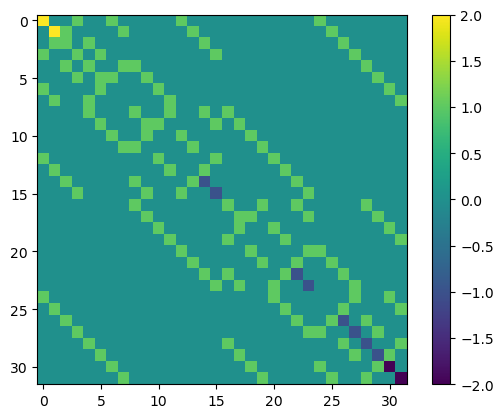

In [144]:
L = 5

H_def = sum([X(x)*X(x+1)+0.5*Z(x) for x in range(L-1)])
# H_def = sum([Z(0)*Z(1)+0.5*X(0)])
H_sym = SymbolicHamiltonian(H_def)

plt.imshow(np.real(H_sym.matrix))
plt.colorbar()

In [151]:
t = 0.1
n = 1
dt = t/n
circ = Circuit(L)
for i in range(n):
    circ += H_sym.circuit(dt)
print(circ.draw())

[Qibo 0.2.12|WARNING|2024-10-24 17:00:00]: Starting on qibo 0.2.13, ``Circuit.draw`` will work in-place. The in-place method is currently implemented as ``Circuit.display``, but will be renamed as ``Circuit.draw`` on release 0.2.13. In release 0.2.12, the in-place display of circuits is accessible as ``Circuit.display``.


q0: ─U─────────────U─
q1: ─U─U─────────U─U─
q2: ───U─U─────U─U───
q3: ─────U─U─U─U─────
q4: ───────U─U───────


In [152]:
print(np.linalg.norm(np.expm1(-1j*t*H_sym.matrix)-circ.unitary()))

5.5477808733947995


In [162]:
for n in range(1,20,3):
    dt = t/n
    circ = Circuit(L)
    for i in range(n):
        circ += H_sym.circuit(dt)
    print(np.linalg.norm(np.expm1(-1j*t*H_sym.matrix)-circ.unitary()))
        

5.5477808733947995
5.547715546096688
5.547712632055671
5.547711911742669
5.547711629210469
5.547711490061236
5.5477114114433785
